In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
%run get_lab.py

enter phystech e-mail
 samohin.vyu@phystech.edu


Your tasks are 1.1, 2.3, 3.2, 4.1


# Задача 1.1

Проверить мощность и консервативность критериев Лиллиефорса, Харке-Бера, Шапиро-Улика для выборок из следующих распределений:

* Нормальное
* Лапласа
* Стьюдента
* Усеченное нормальное распределение (модуль каждого элемента выборки не превосходит 2)

In [ ]:
def get_samples(n, d='normal'):
  mu = np.random.randint(-100, 100)
  sigma = np.random.randint(1, 100)
  
  if d=='normal':
    return st.norm.rvs(loc=mu, scale=sigma, size=n)
  elif d=='laplace':
    return st.laplace.rvs(loc=mu, scale=sigma, size=n)
  elif d=='student_small':
    k = np.random.randint(1, 10)
    return st.t.rvs(df=k, size=n)
  elif d=='student_big':
    k = np.random.randint(50, 100)
    return st.t.rvs(df=k, size=n)
  elif d=='truncated_normal':
    return st.truncnorm.rvs(a=-2, b=2, loc=mu, scale=sigma, size=n)

In [ ]:
## Лиллиефорса
from statsmodels.stats.diagnostic import lilliefors
distributions = ['normal', 'laplace', 'student_small', 'student_big', 'truncated_normal']

num_exp = 1000
alpha = 0.05

for d in distributions:
    if d == 'normal':
        print('Ошибка первого рода (распределение {}) равна '.format(d), end=' ')
    else:
        print('Мощность (распределение {}) равна '.format(d), end=' ')
    for n in range(10, 900, 30):
        counter = 0
        for _ in range(num_exp):
            samples = get_samples(n, d)
            if lilliefors(samples, dist='norm', pvalmethod='approx')[1] <= alpha:
                #reject
                counter += 1
        print('{} ({})'.format(counter/num_exp, n), end=' ')
    print('\n')

Ошибка первого рода (распределение normal) равна  0.052 (10) 0.055 (40) 0.047 (70) 0.049 (100) 0.046 (130) 0.053 (160) 0.045 (190) 0.056 (220) 0.05 (250) 0.048 (280) 0.043 (310) 0.036 (340) 0.05 (370) 0.045 (400) 0.045 (430) 0.057 (460) 0.055 (490) 0.058 (520) 0.046 (550) 0.041 (580) 0.043 (610) 0.052 (640) 0.042 (670) 0.053 (700) 0.043 (730) 0.046 (760) 0.056 (790) 0.038 (820) 0.049 (850) 0.042 (880) 

Мощность (распределение laplace) равна  0.141 (10) 0.375 (40) 0.55 (70) 0.712 (100) 0.806 (130) 0.904 (160) 0.931 (190) 0.965 (220) 0.984 (250) 0.987 (280) 0.991 (310) 0.996 (340) 0.999 (370) 1.0 (400) 1.0 (430) 1.0 (460) 1.0 (490) 1.0 (520) 1.0 (550) 1.0 (580) 1.0 (610) 1.0 (640) 1.0 (670) 1.0 (700) 1.0 (730) 1.0 (760) 1.0 (790) 1.0 (820) 1.0 (850) 1.0 (880) 

Мощность (распределение student_small) равна  0.178 (10) 0.33 (40) 0.408 (70) 0.467 (100) 0.5 (130) 0.52 (160) 0.58 (190) 0.622 (220) 0.64 (250) 0.677 (280) 0.65 (310) 0.682 (340) 0.723 (370) 0.746 (400) 0.753 (430) 0.763 (460) 0

In [ ]:
## Харке-Бер

for d in distributions:
    if d == 'normal':
        print('Ошибка первого рода (распределение {}) равна '.format(d), end=' ')
    else:
        print('Мощность (распределение {}) равна '.format(d), end=' ')
    for n in range(10, 900, 30):
        counter = 0
        for _ in range(num_exp):
            samples = get_samples(n, d)
            if st.jarque_bera(samples)[1] <= alpha:
                #reject
                counter += 1
        print('{} ({})'.format(counter/num_exp, n), end=' ')
    print('\n')

Ошибка первого рода (распределение normal) равна  0.006 (10) 0.043 (40) 0.035 (70) 0.047 (100) 0.044 (130) 0.045 (160) 0.038 (190) 0.043 (220) 0.051 (250) 0.048 (280) 0.05 (310) 0.047 (340) 0.043 (370) 0.055 (400) 0.04 (430) 0.046 (460) 0.057 (490) 0.05 (520) 0.056 (550) 0.051 (580) 0.035 (610) 0.051 (640) 0.049 (670) 0.041 (700) 0.052 (730) 0.041 (760) 0.061 (790) 0.035 (820) 0.054 (850) 0.06 (880) 

Мощность (распределение laplace) равна  0.068 (10) 0.449 (40) 0.643 (70) 0.781 (100) 0.869 (130) 0.92 (160) 0.948 (190) 0.974 (220) 0.983 (250) 0.989 (280) 0.993 (310) 0.998 (340) 0.997 (370) 0.999 (400) 0.999 (430) 1.0 (460) 1.0 (490) 1.0 (520) 1.0 (550) 1.0 (580) 1.0 (610) 1.0 (640) 1.0 (670) 1.0 (700) 1.0 (730) 1.0 (760) 1.0 (790) 1.0 (820) 1.0 (850) 1.0 (880) 

Мощность (распределение student_small) равна  0.102 (10) 0.433 (40) 0.558 (70) 0.67 (100) 0.716 (130) 0.772 (160) 0.802 (190) 0.844 (220) 0.849 (250) 0.877 (280) 0.883 (310) 0.902 (340) 0.917 (370) 0.93 (400) 0.939 (430) 0.953 

In [ ]:
## Шапиро-Уилк

for d in distributions:
    if d == 'normal':
        print('Ошибка первого рода (распределение {}) равна '.format(d), end=' ')
    else:
        print('Мощность (распределение {}) равна '.format(d), end=' ')
    for n in range(10, 900, 30):
        counter = 0
        for _ in range(num_exp):
            samples = get_samples(n, d)
            if st.shapiro(samples)[1] <= alpha:
                #reject
                counter += 1
        print('{} ({})'.format(counter/num_exp, n), end=' ')
    print('\n')

Ошибка первого рода (распределение normal) равна  0.05 (10) 0.047 (40) 0.048 (70) 0.036 (100) 0.052 (130) 0.047 (160) 0.054 (190) 0.049 (220) 0.043 (250) 0.05 (280) 0.046 (310) 0.061 (340) 0.064 (370) 0.053 (400) 0.045 (430) 0.049 (460) 0.048 (490) 0.065 (520) 0.057 (550) 0.053 (580) 0.057 (610) 0.062 (640) 0.055 (670) 0.048 (700) 0.044 (730) 0.063 (760) 0.053 (790) 0.05 (820) 0.056 (850) 0.045 (880) 

Мощность (распределение laplace) равна  0.175 (10) 0.42 (40) 0.647 (70) 0.802 (100) 0.89 (130) 0.941 (160) 0.972 (190) 0.985 (220) 0.997 (250) 0.994 (280) 0.999 (310) 0.999 (340) 1.0 (370) 1.0 (400) 1.0 (430) 1.0 (460) 1.0 (490) 1.0 (520) 1.0 (550) 1.0 (580) 1.0 (610) 1.0 (640) 1.0 (670) 1.0 (700) 1.0 (730) 1.0 (760) 1.0 (790) 1.0 (820) 1.0 (850) 1.0 (880) 

Мощность (распределение student_small) равна  0.192 (10) 0.429 (40) 0.543 (70) 0.637 (100) 0.684 (130) 0.722 (160) 0.732 (190) 0.769 (220) 0.824 (250) 0.829 (280) 0.859 (310) 0.875 (340) 0.887 (370) 0.902 (400) 0.895 (430) 0.918 (460

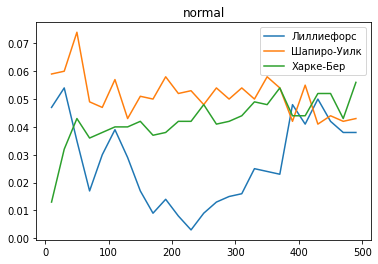

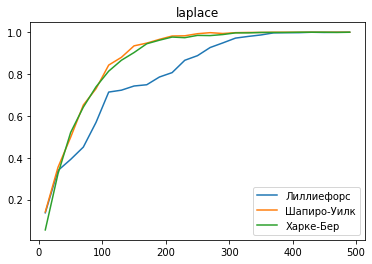

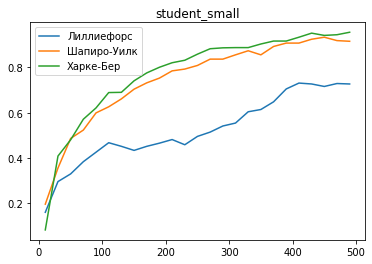

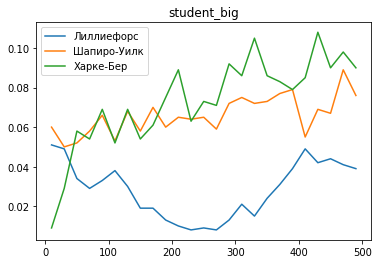

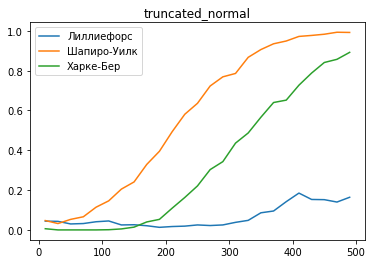

In [ ]:
from functools import partial
from matplotlib import pyplot as plt
volume = np.arange(10, 500, 20)

for d in distributions:
    rejected_all = []
    for name, test in zip(['Лиллиефорс', 'Шапиро-Уилк', 'Харке-Бер'], [partial(lilliefors, dist='norm', pvalmethod='table'), st.shapiro, st.jarque_bera]):
        rejected = []
        for n in volume:
            counter = 0
            for _ in range(num_exp):
                samples = get_samples(n, d)
                if test(samples)[1] <= alpha:
                    counter += 1
                rejected.append(counter/num_exp)
        rejected_all.append((name, rejected))
    for n, data in rejected_all:
        plt.plot(volume, data, label=n)
    plt.legend()
    plt.title(d)
    plt.show()
  


## Выводы
* Из первого графика можем судить о консервативности критериев. Так, тест Лиллиефорса консервативен, остальные тесты менее консервативны. Тест Шапиро-Уилка не консервативен.

* При распределениях, близких к нормальному (н-р Стьюдент с большим числом степеней свободы) мощность критериев падает.

* Критерий Шапиро-Уилка больше остальных чувствителен к хвостам (последний график).